# **CREDIT CARD FRAUD DETECTION**

# **INTRODUCTION**
In the digital age, credit card fraud remains one of the most prevalent forms of financial crime, with millions of cases reported annually across the globe. As consumers continue to rely on online and card-based transactions, the need for effective fraud detection systems has become critical. Financial institutions and e-commerce platforms are increasingly adopting machine learning techniques to automatically identify fraudulent transactions based on patterns in transaction data.

# **PROBLEM STATEMENT**
Credit card fraud is a significant challenge for financial institutions, causing substantial financial losses and damaging consumer trust. Fraudulent transactions can occur across various channels, often exploiting vulnerabilities in traditional detection methods. The goal of this project is to develop a machine learning model that can accurately classify credit card transactions as fraudulent or non-fraudulent, using historical transaction data. By identifying fraudulent transactions in real-time, the model can help financial institutions prevent financial losses reducing the financial impact of fraud and improve customer security.

The primary challenge in this problem is the highly imbalanced nature of the dataset, where fraudulent transactions are much fewer than non-fraudulent ones. Therefore, the project will focus not only on building an accurate predictive model but also on handling class imbalance to ensure that the model captures as many fraudulent cases as possible while minimizing false positives.



# 1. LOADING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# 2. **LOADING THE DATASET**

The [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud ) contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, it does provide the original features and more background information about the data due to confidentiality issues. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
credit_card_df = pd.read_csv('creditcard.csv')

In [6]:
#reading the dataset
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. **DATA EXPLORATION

To understand the structure of the data

In [8]:
credit_card_df.shape

(284807, 31)

In [9]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
credit_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
#checking for missing values
credit_card_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There are no missing values

In [13]:
credit_card_df.duplicated().sum()

1081

 There are a total of 1081 duplicated values so we have to drop them. Duplicated fraudulent transactions may cause the model to be biased,either making it too sensitive (overfitting) or not able to detect fraud properly (underfitting). So we drop them.



In [14]:
credit_card_df = credit_card_df.drop_duplicates()

In [15]:
credit_card_df.duplicated().sum()

0

In [16]:
#Check the distribution of the target variable (Class) to identify class imbalance,
credit_card_df['Class'].value_counts()

,count
Class,
0,283253
1,473


Class 0 (Non-Fraudulent Transactions): There are 283,253 non-fraudulent transactions (where Class = 0).

Class 1 (Fraudulent Transactions): There are 473 fraudulent transactions (where Class = 1).

 This shows a highly imbalanced dataset, where fraudulent transactions (Class = 1) are very rare compared to non-fraudulent ones (Class = 0).

Since the fraudulent transactions are much fewer in number, this imbalance could make it difficult for a machine learning model to detect fraud effectively. The model may be biased towards predicting non-fraudulent transactions, leading to poor detection of fraud.

**Possible Solutions:**



*   Resampling: You can apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to oversample the fraudulent transactions or undersample the non-fraudulent transactions to balance the classes.

*   Class Weights: Many algorithms, like Logistic Regression, Random Forest, or XGBoost, allow you to set higher weights for the minority class to account for the imbalance.




Lets Visualize this

# 3.1**VISUALIZATION**

# 1 . Visualize Class Distribution:

bar charts to visualize the distribution between fraudulent (Class = 1) and non-fraudulent (Class = 0) transactions.

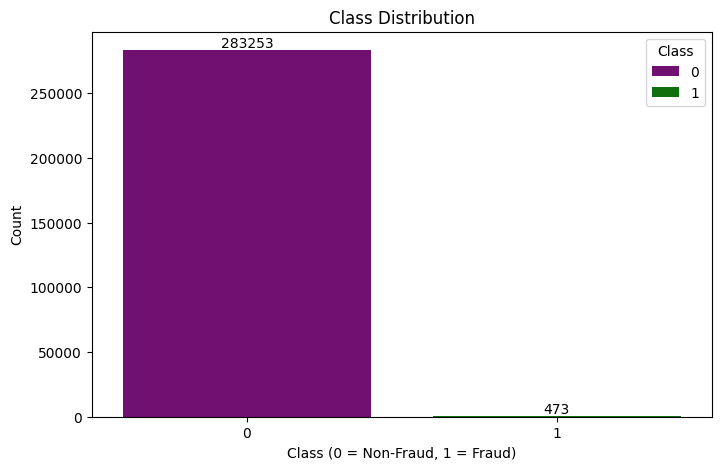

In [17]:
# Create the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=credit_card_df, x='Class', hue='Class', palette=['purple', 'green'])

# Add data labels on the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# 2. Amount Feature Analysis:
Refers to the examination of the Amount variable within the credit card transaction dataset, focusing on understanding how transaction amounts vary between fraudulent and non-fraudulent transactions. This analysis is crucial in fraud detection for Identifying Patterns and Detecting Anomalies.

box plots to explore transaction amounts
and identify if they differ between fraud and non-fraud classes.

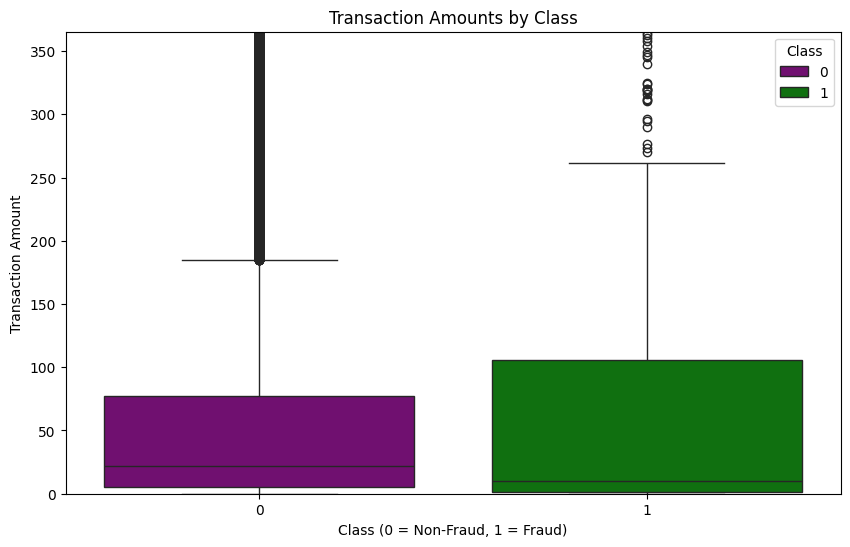

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_df, hue='Class', palette=['purple', 'green'])
plt.title('Transaction Amounts by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.ylim(0, credit_card_df['Amount'].quantile(0.95))
plt.show()

# **INTERPRETATION**

For non-fraudulent transactions (Class 0), the median (thick line in the box) is lower compared to fraudulent transactions. Most of the transactions are concentrated below 50, with a few high-value outliers reaching above 350.

For fraudulent transactions (Class 1), the distribution is more compact, with the median slightly higher than in Class 0. There are fewer extreme outliers compared to Class 0.

**Key Observations:**

Fraudulent transactions tend to have a higher median transaction value than non-fraudulent ones.
There are more extreme transaction amounts (outliers) in the non-fraudulent class, suggesting that large transaction amounts may not necessarily indicate fraud on their own.

# 3. Anonymized Features (V1-V28):

I'll visualize this with a heatmap of the correlation matrix for all the anonymized features (V1 to V28)

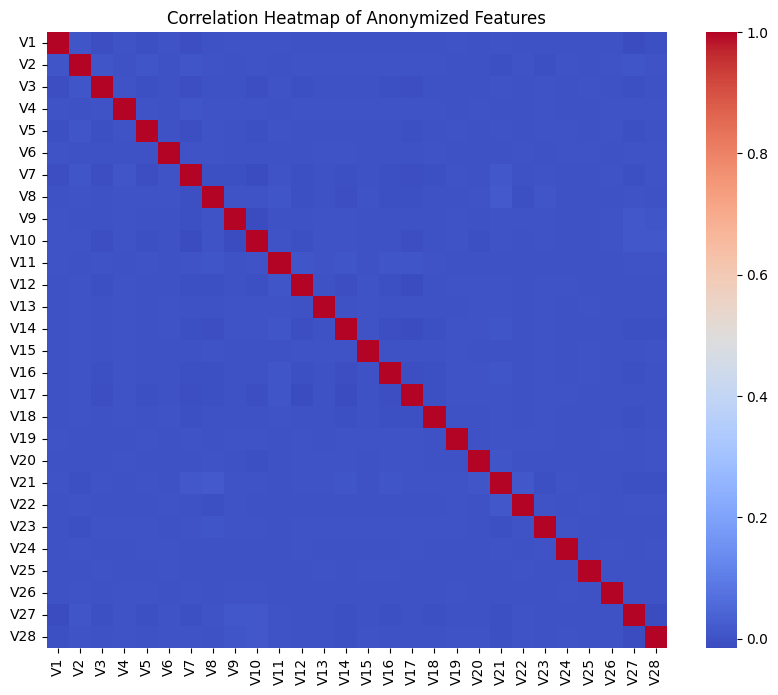

In [19]:
corr_matrix = credit_card_df.loc[:, 'V1':'V28'].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm' )

plt.title('Correlation Heatmap of Anonymized Features')
plt.show()

# **INTERPRETATION**

There doesn't seem to be strong correlations between different features, implying that each feature likely contributes uniquely to the classification process without much redundancy.

The features V1 to V28 are generally independent of one another, which is often desired in machine learning models as it reduces multicollinearity.


# 4. **DATA PREPROCESSING**

# 4.1 Feature Selection

In [20]:
credit_card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
#dropping unecessary columns
credit_card_df = credit_card_df.drop(['Time'], axis=1 )

In [22]:
credit_card_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
X= credit_card_df.drop('Class', axis=1)
y= credit_card_df['Class']

# 4.2 Scaling

we will only scale amount column as (anonymized features) the   other columns are already scaled by the PCA transformation.  

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Instantiate the Scaler
scaler = StandardScaler()

In [26]:
# Fit the data into scaler and transform
X['Amount'] = scaler.fit_transform(X[['Amount']])

# 4.3 TRAIN-TEST SPLIT

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((226980, 29), (226980,), (56746, 29), (56746,))

# **5. ADDRESSING CLASS IMBALANCE**

I will address this using SMOTE (Synthetic Minority Over-sampling Technique): Use SMOTE to oversample the minority (fraud) class in the training set. Apply SMOTE only on the training set to avoid data leakage

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

In [31]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# **6. TRAINING THE MODEL**

* I will Start with a few different models commonly used for fraud detection, such as:
    * Logistic Regression: A good baseline model for binary classification.
    * Random Forest & XGBoost: Popular tree-based models that often perform well in fraud detection.
    * Support Vector Machine (SVM): Known for its robustness in high-dimensional data.

 We will first do cross validation. Cross-validation assess how well a model will generalize to unseen data.

 Grid search is used to find the best hyperparameters for a model.We will use grid search to get the optimized values of hyper parameters. GridSearch is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

**WHY I DID NOT USE RANDOM FOREST?**

 I decided not to continue Random Forest as it is time-consuming on large datasets because it involves training multiple decision trees as part of the ensemble, each operating independently and requiring significant memory and processing power.

**WHY I DID NOT USE SUPPORT VECTOR MACHINES?**

1. SVM requires High Computation Time: SVMs can be slow with large datasets.
2. Memory-Intensive: SVM requires storing support vectors, which can be memory-intensive on larger datasets.


In [32]:
#Define a cross-validation scheme using StratifiedKFold to handle class imbalance:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# **6.1: LOGISTIC REGRESSION**

In [33]:
# Define hyperparameters
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

In [34]:
# Initialize GridSearchCV with resampled data
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=skf, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [35]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of', log_reg_grid.best_score_,'using', log_reg_grid.best_params_)

We can get accuracy of 0.9426983887970255 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
# model with the best hyperparameters
best_lg =  LogisticRegression(C=10, penalty='l2', solver='liblinear')

In [37]:
best_lg_model = best_lg.fit(X_train_resampled, y_train_resampled)

In [38]:
# Cross-validation to evaluate the best Logistic Regression model
lg_scores = cross_val_score(best_lg_model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(n_splits=5), scoring='f1')
print("Cross-Validation F1 Scores:", lg_scores)
print("Average F1 Score:", lg_scores.mean())

Cross-Validation F1 Scores: [0.94222343 0.94181612 0.94247124 0.94421886 0.94300824]
Average F1 Score: 0.9427475770981655


# model evaluation for Logistic Regression


* Metrics to Focus On:
    * Precision and Recall: Focus on achieving high recall (to catch most fraudulent cases) while maintaining precision to avoid false positives.
    * F1-Score: Useful to balance precision and recall.
    * ROC-AUC: Plot and analyze the AUC-ROC curve to understand the model’s ability to distinguish between fraud and non-fraud.
    * Confusion Matrix: Plot and analyze the confusion matrix for each model to understand true positives, false positives, etc.

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [40]:
# 1. Predicting using the best model
y_pred = best_lg_model.predict(X_test)

[[55143  1513]
 [    6    84]]


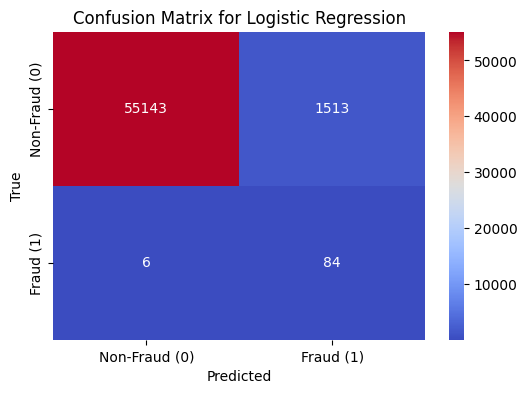

In [41]:
# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# INTERPRETATION



*   High True Negative Rate: The model performs well at identifying
non-fraudulent transactions accurately.

*   Low False Negative Rate: Only a small number of fraud cases (6) were missed, meaning the model is effective in detecting fraudulent cases.

*    Relatively High False Positive Rate: With 1,513 false positives, the model has some tendency to incorrectly classify non-fraudulent cases as fraud.








In [42]:
# 3. Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56656
           1       0.05      0.93      0.10        90

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.54     56746
weighted avg       1.00      0.97      0.99     56746



# INTERPRETATION

# SUMMARY

Accuracy: 0.97

Precision: 0.05 (for fraud class)

Recall: 0.93 (for fraud class)

F1-Score: 0.10 (for fraud class)

Confusion Matrix:
 [[55143  1513][    6    84]]

**High Overall Accuracy:**
 The model has a high accuracy of 97%, meaning it correctly classifies most transactions. However, given the class imbalance (many more non-fraud than fraud cases), accuracy alone can be misleading.

**Non-Fraud Detection (Class 0):**

 The model is very effective at identifying non-fraud cases, with nearly perfect precision and recall (1.00 and 0.97, respectively). This means it correctly identifies most non-fraud transactions and rarely misclassifies them as fraud.

**Fraud Detection (Class 1):**

 The model's recall for fraud cases is high (0.93), capturing most fraud cases, which is crucial in fraud detection. However, precision for fraud is very low (0.05), meaning there are many false positives—cases labeled as fraud that aren't actually fraud. This low precision reduces the model's practical effectiveness for fraud detection.

**Class Imbalance Impact:**

 Due to the significantly higher number of non-fraud cases, the model's performance on fraud cases (minority class) is weaker, as seen in the low precision and F1-score for fraud. This is a common challenge in fraud detection and suggests the need for additional tuning, such as threshold adjustment or methods to address the class imbalance.

While the model is highly accurate and effective at identifying non-fraud cases, it could benefit from techniques to improve its precision on fraud cases, helping reduce false positives and making it more reliable for fraud detection.




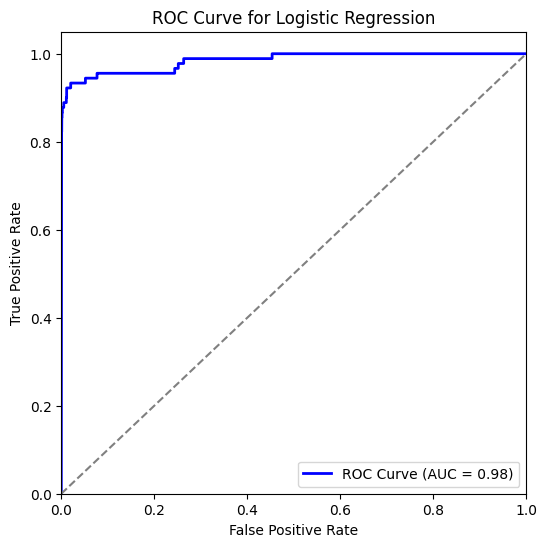

In [75]:
# 4. ROC Curve and AUC
# Get probabilities for ROC curve
y_probs_lg = best_lg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Fraud = 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lg)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# **INTERPRETATION**

We can see that we have very good ROC on the test set 0.98, which is almost close to 1.

The logistic regression model is performing exceptionally well, with a high AUC score of 0.98, indicating that it can accurately classify fraudulent and non-fraudulent transactions with minimal error.




# Threshold Tuning -

Adjust the decision threshold for your model to optimize recall or precision based on business needs.


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Define the thresholds you want to test

for threshold in thresholds:
    # Apply the threshold to classify as 1 (fraud) or 0 (non-fraud)
    y_pred = (y_probs_lg >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")


Threshold: 0.3
Accuracy: 0.94
Precision: 0.02
Recall: 0.94
F1-Score: 0.05
Confusion Matrix:
[[53245  3411]
 [    5    85]]


Threshold: 0.4
Accuracy: 0.96
Precision: 0.04
Recall: 0.93
F1-Score: 0.07
Confusion Matrix:
[[54406  2250]
 [    6    84]]


Threshold: 0.5
Accuracy: 0.97
Precision: 0.05
Recall: 0.93
F1-Score: 0.10
Confusion Matrix:
[[55143  1513]
 [    6    84]]


Threshold: 0.6
Accuracy: 0.98
Precision: 0.08
Recall: 0.92
F1-Score: 0.14
Confusion Matrix:
[[55647  1009]
 [    7    83]]


Threshold: 0.7
Accuracy: 0.99
Precision: 0.11
Recall: 0.92
F1-Score: 0.20
Confusion Matrix:
[[55986   670]
 [    7    83]]




In selecting the best threshold for logistic regression, the goal is to find a balance between precision and recall, especially for the minority class (fraud cases).


**Threshold 0.7** is the best choice here, as it provides the highest precision and F1-score without sacrificing much recall. The improvement in precision means fewer false positives, which is valuable for fraud detection, as it reduces the burden of unnecessary alerts while still capturing most fraudulent cases.

Threshold 0.7 balances the trade-off between precision and recall, offering the most effective performance for this logistic regression mode


   
#  **REDUCING THE THRESHOLD WILL HAVE THE FOLLOWING EFFECTS**
1. Increase in Recall (Sensitivity): Lowering the threshold will generally increase the recall for the positive class (fraudulent transactions in this case). This is because more cases will be classified as fraud, so the model is likely to capture more actual fraud cases (fewer false negatives). This is often crucial in fraud detection, where missing fraud cases can be costly.

2. Decrease in Precision: Lowering the threshold usually leads to a decrease in precision for the positive class. This is because the model will also classify more non-fraudulent transactions as fraud (more false positives), which increases the number of incorrectly flagged transactions. Higher false positives can lead to inefficiency and more manual reviews.

3. Higher False Positives: A reduced threshold results in more cases being flagged as fraud, including non-fraudulent transactions, which could burden resources (e.g., reviewing flagged cases) or cause customer dissatisfaction if incorrectly classified.

# **If the threshold is increased in a fraud detection model:**

Lower Recall: Fewer fraud cases are detected (lower recall), so some fraudulent transactions might go unnoticed.

Higher Precision: A greater proportion of flagged cases are actually fraudulent, meaning fewer false alarms for the investigation team.

Lowering the threshold can be beneficial if your primary goal is to capture more fraud cases (maximize recall), but it often requires balancing with precision to avoid excessive false positives. This trade-off can be fine-tuned based on business requirements, and it may be beneficial to experiment with different thresholds to find the optimal balance.

#** SUMMARY AFTER THRESHOLD TUNING**

*    Improved fraud detection: The model now has a better precision of 0.11 and a higher F1-score of 0.20 for fraud, but it still struggles with a high number of false positives.

*    Improved non-fraud performance: Precision and recall for non-fraud cases are still very high, indicating that threshold tuning mainly affected fraud detection without sacrificing non-fraud performance.

*    Accuracy remains high (99%), but this does not necessarily reflect a good model for fraud detection due to the imbalance in the dataset.

* Threshold tuning has improved fraud detection (increased precision and F1-score), but the model still misclassifies a significant number of non-fraud cases as fraud (false positives).

* Recall for fraud is high, but precision remains low, indicating the model still needs improvement for minimizing false positives.

* The optimal threshold should balance precision and recall for fraud detection, depending on the importance of reducing false positives versus maximizing recall (detecting fraud).




# **6.2: XGBOOST**-
XGBoost is designed for high performance and can handle large datasets efficiently

In [49]:
# Define hyperparameters
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.3, 0.6, 0.9]
}

In [51]:
# Initialize GridSearchCV with the XGBClassifier and parameter grid
xgb_grid = GridSearchCV(XGBClassifier(), param_grid=xgb_params, cv=3, scoring='f1', n_jobs=-1)

In [52]:
# Fit the model on the resampled data
xgb_grid.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.3, 0.6, 0.9]},
             scoring='f1')

The warning indicates that there was an issue while executing parallel tasks in the background, typically due to one of two causes:

Worker Timeout: If your training process takes too long, the parallel workers (used in GridSearchCV, cross-validation, etc.) may exceed the allowed time for a single task.

Memory Issues: The process might be running out of available memory, which can cause workers to stop unexpectedly. This is common when working with large datasets or highly complex models.

In [54]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of', xgb_grid.best_score_,'using', xgb_grid.best_params_)

We can get accuracy of 0.999812477904236 using {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}


In [63]:
best_xgb = xgb_grid.best_estimator_

In [64]:
## Cross-validation to evaluate the best XGBoost model
xgb_scores = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=skf, scoring='f1')
print("XGBoost F1 Scores:", xgb_scores)
print("Average F1 Score:", xgb_scores.mean())

XGBoost F1 Scores: [0.99976836 0.99986762 0.99987866 0.99979042 0.99979042]
Average F1 Score: 0.9998190966560104


# model evaluation for XGBoost

In [65]:
# 1. Predicting using the best model
y_pred_xgb = best_xgb.predict(X_test)

[[56637    19]
 [   16    74]]


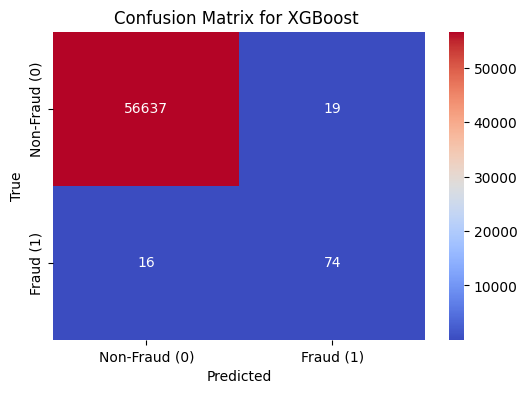

In [66]:
# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix for XGBoost ')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# INTERPRETATION

* Low False Positive Rate: Only 19 false positives, meaning the model is very accurate at identifying non-fraud cases.

* Low False Negative Rate: Only 16 fraudulent cases were missed, indicating effective fraud detection.

* This confusion matrix suggests that the XGBoost model is highly accurate, with very few misclassifications, making it a strong performer for distinguishing between fraud and non-fraud cases.




In [67]:
#3. Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.80      0.82      0.81        90

    accuracy                           1.00     56746
   macro avg       0.90      0.91      0.90     56746
weighted avg       1.00      1.00      1.00     56746



# INTERPRETATION

1. **Class 0 (Non-Fraudulent Transactions)**

* Precision: 1.00 - When the model predicts a transaction as non-fraudulent, it is almost always correct.

* Recall: 1.00 - The model captures nearly all actual non-fraudulent transactions, meaning very few false positives (fraudulent transactions incorrectly classified as non-fraudulent).
* F1-Score: 1.00 - A perfect balance of precision and recall, which is expected given the high support (total count) for non-fraudulent transactions in the dataset.
    
2. **Class 1 (Fraudulent Transactions)**

* Precision: 0.80 - When the model predicts a transaction as fraudulent, it is correct about 80% of the time. There are some false positives (non-fraudulent transactions incorrectly labeled as fraudulent).

* Recall: 0.82 - The model identifies 82% of all actual fraudulent transactions, which is a strong recall rate given the imbalance.

* F1-Score: 0.81 - This metric combines precision and recall, indicating the model has a good balance for identifying fraudulent cases, though not perfect.  

3. **Overall Model Performance**

*  Accuracy: 1.00 - The model has very high overall accuracy, which is expected given the class imbalance (more non-fraudulent cases than fraudulent).

The model performs extremely well in identifying non-fraudulent transactions (Class 0) with near-perfect accuracy, precision, and recall

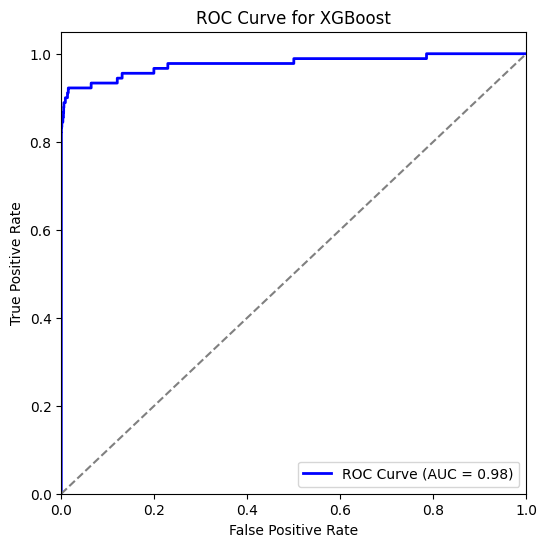

In [68]:
# 4. ROC Curve and AUC
# Get probabilities for ROC curve
y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Fraud = 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

# INTERPRETATION



* The curve is close to the top-left corner, indicating high sensitivity (true positive rate) with a low false positive rate.

* AUC (Area Under the Curve): 0.98, which is very close to 1.0, suggesting that the XGBoost model has excellent discriminative power and is highly effective at separating fraudulent from non-fraudulent cases.
  






# **Threshold Tuning**

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix # Import necessary functions

def evaluate_threshold(y_true, y_pred_proba, threshold=0.5):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = np.where(y_pred_proba >= threshold, 1, 0)

    # Calculate metrics
    accuracy = np.mean(y_pred == y_true)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

#  Evaluate at different thresholds
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    evaluate_threshold(y_test, y_probs, threshold=threshold)


Threshold: 0.3
Accuracy: 1.00
Precision: 0.76
Recall: 0.83
F1-Score: 0.79
Confusion Matrix:
[[56632    24]
 [   15    75]]

Threshold: 0.4
Accuracy: 1.00
Precision: 0.78
Recall: 0.83
F1-Score: 0.81
Confusion Matrix:
[[56635    21]
 [   15    75]]

Threshold: 0.5
Accuracy: 1.00
Precision: 0.80
Recall: 0.82
F1-Score: 0.81
Confusion Matrix:
[[56637    19]
 [   16    74]]

Threshold: 0.6
Accuracy: 1.00
Precision: 0.82
Recall: 0.82
F1-Score: 0.82
Confusion Matrix:
[[56640    16]
 [   16    74]]

Threshold: 0.7
Accuracy: 1.00
Precision: 0.86
Recall: 0.82
F1-Score: 0.84
Confusion Matrix:
[[56644    12]
 [   16    74]]



Based on the F1-Score, which is a balanced measure, the 0.7 threshold appears to be the best choice, achieving the highest F1-Score (0.84). This threshold also has high precision (0.86) and reasonably high recall (0.82), making it a good option if you want a strong balance of precision and recall.

# **SUMMARY AFTER THRESHOLD TUNING**

**Before Threshold Tuning**
Precision (Class 1 - Fraud): 0.80

Recall (Class 1 - Fraud): 0.82

F1-Score (Class 1 - Fraud): 0.81

Overall Accuracy: 1.00

Macro Avg (Across Both Classes): Precision: 0.90, Recall: 0.91, F1-Score: 0.90

**After Threshold Tuning (Threshold = 0.7)**
Precision (Class 1 - Fraud): 0.86 (improved from 0.80)

Recall (Class 1 - Fraud): 0.82 (remains the same)

F1-Score (Class 1 - Fraud): 0.84 (improved from 0.81)

Overall Accuracy: 1.00

1. Precision for fraud cases improved significantly, from 0.80 to 0.86, indicating fewer false positives at the 0.7 threshold.

2. F1-Score for fraud cases also increased from 0.81 to 0.84, suggesting an overall better balance of precision and recall.

3. Recall for fraud cases stayed the same, meaning the model's ability to detect fraud cases was maintained even with a higher threshold.

# Conclusion

The threshold tuning (0.7) improved precision and F1-Score for fraud cases without compromising recall or overall accuracy. This refined threshold is likely better for applications where reducing false positives is critical, while still maintaining a strong fraud detection capability.









# ***7.  FINAL MODEL SELECTION      

The ROC-AUC for both models is 0.98, indicating that both models have similar discriminative power.

Given that fraud detection usually prioritizes identifying as many fraud cases as possible (even at the cost of some false positives), Logistic Regression would be the preferred model in this case, particularly after threshold tuning.

# Why I PREFERED LOGISTIC REGRESSION OVER XGBoost?
1. Faster Training: Logistic Regression is a simpler linear model and generally trains much faster, especially for smaller to medium-sized datasets.

2. Lower Computational Resources: It requires less memory and computational power, making it ideal for environments where resources are limited.

3. Simplicity & Interpretability: Logistic Regression models are easier to interpret and faster to implement compared to tree-based models like XGBoost.


# WHY I DID NOT PREFER XGBoost

XGBoost is a good model but is  XGBoost is generally more computationally expensive compared to simpler models like Logistic Regression, especially as the dataset size increases


1. XGBoost is based on gradient boosting, which involves iteratively building decision trees in an ensemble. Each tree focuses on correcting the errors made by the previous one.
For larger datasets, this iterative tree-building process can consume a significant amount of memory and processing power.


2. XGBoost has many hyperparameters (e.g., learning rate, max depth, subsample, colsample_bytree, etc.) that need to be tuned for optimal performance. Hyperparameter search (e.g., GridSearchCV or RandomizedSearchCV) further adds to the computational cost.
Tuning these parameters typically involves cross-validation, which requires retraining the model multiple times, amplifying the computational cost.


3. The training time for XGBoost can grow rapidly with the number of rows and features. For a large dataset, training each tree involves complex calculations and feature splits, which can take time and memory.
With large datasets, the training time could be prohibitively long unless you have a high-performance computing environment or access to GPU-based training.
Regularization and Optimization:

4. GBoost applies both L1 and L2 regularization to the models, which increases its computational complexity, especially when scaling to large datasets.
It also uses second-order optimization (i.e., considering both the gradient and the Hessian), which, while effective in achieving higher accuracy, also requires more memory and computation.

# What to Do in the Case of High Computation in XGBoost:


1. Use GPU for Training: If you have access to a machine with a compatible NVIDIA GPU, you can use XGBoost's GPU acceleration feature, which significantly reduces training time for large datasets.

2. Optimize Hyperparameters Efficiently: Instead of grid search, consider using RandomizedSearchCV or Bayesian Optimization for more efficient hyperparameter tuning.

3. Reduce Model Complexity: Consider reducing the number of features (feature selection) or limiting the depth of trees to speed up training.

4. Limit the Number of Trees: Limit the number of boosting rounds or trees (e.g., by setting early stopping during training) to prevent unnecessary computational overhead.



# **8. CONCLUSION**
1. Best Model: XGBoost outperformed Logistic Regression in terms of the f1-score after threshold tuning, making it the preferred model for detecting fraud. Despite its computational cost, the model's performance justifies its usage in a high-stakes fraud detection setting where minimizing false negatives (missed frauds) is crucial.

2. Trade-Off Consideration: If computational resources are limited, Logistic Regression might still be a viable option, especially for smaller datasets or when a quick solution is needed. However, for larger datasets where performance is paramount, XGBoost offers better accuracy and recall, making it more suited for real-time fraud detection systems.

3. Recommendation: Based on the project’s findings, we recommend using XGBoost for detecting fraudulent transactions, but with careful attention to computational efficiency. Threshold tuning is key in balancing the precision-recall trade-off, which ensures fraud detection is optimized without overwhelming the system with false positives.



# 9. **BUSINESS** **IMPLICATION**

1. Minimizing Financial Losses: The project helps businesses reduce losses due to fraudulent transactions by catching fraud early and preventing chargebacks, identity theft, and other financial damages.

2. Protecting Customer Trust: A robust fraud detection system strengthens customer trust by ensuring their financial data is secure, preserving the company’s reputation.

3. Reducing Operational Costs: Automating fraud detection reduces the need for manual interventions, saving both time and resources while minimizing false positives.

4. Enhancing Scalability: Machine learning models like XGBoost scale efficiently with growing transaction volumes, ensuring business operations remain secure as the business expands.

5. Improved Decision-Making: Optimized thresholds allow businesses to make more informed real

# **10. HOW IT CAN BE IMPLEMENTED AND BE CHECKED WITH   USER INPUTS IN THE REAL WORLD?**

  
1. Data Collection: Integrate real-time transaction data from payment systems or financial institutions using APIs.

2. Model Deployment: Deploy the model on cloud platforms (AWS, Google Cloud) or using containers for scalability, ensuring it can process transactions in real-time.

3. Threshold Tuning: Implement dynamic threshold adjustments to balance fraud detection with minimizing false positives, fine-tuning the model regularly.

4. User Interaction: Set up real-time alerts for users to confirm suspicious transactions, with mechanisms like multi-factor authentication (MFA) for verification.

5. Continuous Monitoring: Regularly monitor performance (precision, recall, F1 score) and retrain the model with fresh data to adapt to evolving fraud tactics.

6. Real-World Validation: Continuously track metrics like false positives and negatives to assess the model's performance and adjust as necessary.

7. Customer Feedback: Incorporate user feedback to refine the model, reduce false alarms, and enhance fraud detection accuracy.

8. Ethical and Legal Considerations: Ensure fairness, compliance with data privacy laws (e.g., GDPR), and address any biases in the model.

9. Business Impact: The implementation will lead to improved customer experience, cost savings by reducing fraud-related losses, and scalability as the business grows.



# **11.  SAVING THE MODEL**

# LOGISTIC REGRESSION MODEL

In [79]:
import joblib

# Save Logistic Regression model
joblib.dump(best_lg_model, 'fraud_logistic_regression_model.pkl')


['fraud_logistic_regression_model.pkl']

In [ ]:
# Load Logistic Regression model
#logistic_model = joblib.load('fraud_logistic_regression_model.pkl')


In [80]:
from google.colab import files

# Download the model file to your local computer
files.download('fraud_logistic_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# XGBOOST MODEL

In [81]:
# Save XGBoost model
joblib.dump(best_xgb, 'fraud_XGBoost_model.pkl')


['fraud_XGBoost_model.pkl']

In [ ]:
# Load XGBoost model
#xgb_model = joblib.load('XGBoost_model.pkl')


In [82]:
from google.colab import files

# Download the model file to your local computer
files.download('fraud_XGBoost_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>